####Max. 3 improvments on 1st file(EVA_Assignment_4_Part1.ipynb) - Parameters, Batch Normalization and Epochs 15.
####Model achieved validation accuracy- 99.10%.
####Observation - Model takes more time to process each epoch.

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
# Importing Keras library
import keras

Using TensorFlow backend.


In [0]:
# Import numpy which is fundamental package for scientific computing in python
import numpy as np
# Using sequential model from models available in keras
from keras.models import Sequential
# Importing keras layers
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
# Importing utilities which transform data
from keras.utils import np_utils
# Importing mnist from dataset for image processing
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
# Loading train and test data 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


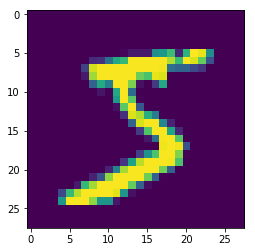

In [4]:
# Printing train data shape
print (X_train.shape)
# Matplotlib is used for ploting graph
from matplotlib import pyplot as plt
# Ploting image under code cell
%matplotlib inline
# Ploted image of train[0] from train data set
plt.imshow(X_train[0])

In [0]:
# Reshaping for train and test data for processing
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Conversion of train and test data set
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
# output of train data array and its data type
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
# Output of train data set array of dimension 10
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
# Using Activation function from keras layers
from keras.layers import Activation, BatchNormalization
# Defining sequential model
model = Sequential()
# Using convolution and Max Pooling operation on input image

model.add(Convolution2D(12, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())
model.add(Convolution2D(12, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Convolution2D(24, 3, 3, activation='relu')) # 22
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) # 11

model.add(Convolution2D(12, 1, 1, activation='relu')) # 11
model.add(BatchNormalization())
model.add(Convolution2D(12, 3, 3, activation='relu')) # 9
model.add(BatchNormalization())
model.add(Convolution2D(24, 3, 3, activation='relu')) # 7
model.add(BatchNormalization())


model.add(Convolution2D(10, 1)) # 7
model.add(BatchNormalization())
model.add(Convolution2D(10, 7)) # 1

# using flatten to convert multidimension array into 1-d array
model.add(Flatten())
# Using softmax activation function for probability distribution
model.add(Activation('softmax'))
# Print Model summary 
model.summary()


Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (1, 1), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launc

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 12)        120       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 12)        48        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 12)        1308      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 12)        48        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 24)        2616      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 24)        96        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 24)        0         
__________

In [0]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# fit model for training data
model.fit(X_train, Y_train, batch_size=32, epochs=15, verbose=1, validation_data=(X_test, Y_test))



Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 23s 379us/step - loss: 0.1330 - acc: 0.9589 - val_loss: 0.0413 - val_acc: 0.9856
Epoch 2/15
60000/60000 [==============================] - 19s 316us/step - loss: 0.0493 - acc: 0.9843 - val_loss: 0.0349 - val_acc: 0.9878
Epoch 3/15
60000/60000 [==============================] - 19s 316us/step - loss: 0.0394 - acc: 0.9873 - val_loss: 0.0317 - val_acc: 0.9886
Epoch 4/15
60000/60000 [==============================] - 19s 316us/step - loss: 0.0321 - acc: 0.9901 - val_loss: 0.0269 - val_acc: 0.9907
Epoch 5/15
60000/60000 [==============================] - 20s 332us/step - loss: 0.0280 - acc: 0.9908 - val_loss: 0.0390 - val_acc: 0.9869
Epoch 6/15
60000/60000 [==============================] - 19s 322us/step - loss: 0.0237 - acc: 0.9927 - val_loss: 0.0313 - val_acc: 0.9892
Epoch 7/15
60000/60000 [==============================] - 19s 316us/

In [13]:
# evaluating and printing model score
score = model.evaluate(X_test, Y_test, verbose=0)
print('Loss:', score[0])
print('Accuracy:', score[1])

Loss: 0.028353775631960478
Accuracy: 0.991
